In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

## Get all frames with bboxes around the text captions

In [1]:
import cv2
import os

# Define the path to the video
video_path = "/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/videos/3aAi2dqQ1iI.mp4"

# Create a folder for the cropped frames
video_name = os.path.basename(video_path).split('.')[0]
output_folder = f"bbox_frames_{video_name}"
os.makedirs(output_folder, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Seek to the 3420th frame
frame_number = 3420
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the specific frame
ret, frame_3420 = cap.read()

if not ret:
    print(f"Failed to capture frame number {frame_number}.")
    cap.release()
    exit()

# Display the frame and let the user select a bounding box
bbox = cv2.selectROI("Select Bounding Box", frame_3420, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

# Get the coordinates of the bounding box
x, y, w, h = map(int, bbox)
print(x, y, w, h)

# Reset the video capture to start from the beginning
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Process each frame in the video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Crop the frame to the bounding box
    cropped_frame = frame[y:y+h, x:x+w]

    # Save the cropped frame
    frame_filename = os.path.join(output_folder, f"frame_{frame_count:05d}.jpg")
    cv2.imwrite(frame_filename, cropped_frame)
    
    frame_count += 1

# Release the video capture object
cap.release()
print(f"All frames have been cropped and saved to '{output_folder}'.")

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
2 294 627 66
All frames have been cropped and saved to 'bbox_frames_3aAi2dqQ1iI'.


## White part only

In [6]:
# import cv2
# import numpy as np
# import os

# Specify the path to the video and output folder
video_path = "/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/videos/3aAi2dqQ1iI.mp4"
video_name = os.path.basename(video_path).split('.')[0]
video_dir = os.path.dirname(video_path)
speaker_dir = os.path.dirname(video_dir)

output_folder = os.path.join(speaker_dir, f"gaussian_bbox_frames_{video_name}")
print(f"{output_folder = }")
os.makedirs(output_folder, exist_ok=True)

# # Open the video file
cap = cv2.VideoCapture(video_path)

# # Seek to the 3420th frame to get the bounding box
# frame_number = 3420
# cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
# ret, frame_3420 = cap.read()
# if not ret:
#     print(f"Failed to capture frame number {frame_number}.")
#     cap.release()
#     exit()

# # Display the frame and let the user select a bounding box
# bbox = cv2.selectROI("Select Bounding Box", frame_3420, fromCenter=False, showCrosshair=True)
# cv2.destroyAllWindows()

# # Get the coordinates of the bounding box
# x, y, w, h = map(int, bbox)
# # Reset the video capture to start from the beginning
# cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
x, y, w, h = 2, 294, 627, 66

# Process each frame in the video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Crop the frame to the bounding box
    cropped_frame = frame[y:y+h, x:x+w]

    # Convert the cropped frame to grayscale
    gray_frame = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2GRAY)

    # Create a binary mask where white areas are white (255) and others are black (0)
    _, mask = cv2.threshold(gray_frame, 200, 255, cv2.THRESH_BINARY)

    # Apply the mask to the cropped frame
    white_parts = cv2.bitwise_and(cropped_frame, cropped_frame, mask=mask)
    
    # now we apply a small gaussian blur to remove noise
    white_parts = cv2.GaussianBlur(white_parts, (3, 3), 0)

    # Save every 30th frame if there's any white part
    if np.any(mask):
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:05d}.jpg")
        print(f"{frame_count = } | {white_parts.shape = } | {frame_filename = }")
        cv2.imwrite(frame_filename, white_parts)

    frame_count += 1

# Release the video capture object
cap.release()
print(f"Every 30th frame with white parts has been cropped and saved to '{output_folder}'.")

output_folder = '/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/gaussian_bbox_frames_3aAi2dqQ1iI'
frame_count = 0 | white_parts.shape = (66, 627, 3) | frame_filename = '/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/gaussian_bbox_frames_3aAi2dqQ1iI/frame_00000.jpg'
frame_count = 1 | white_parts.shape = (66, 627, 3) | frame_filename = '/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/gaussian_bbox_frames_3aAi2dqQ1iI/frame_00001.jpg'
frame_count = 2 | white_parts.shape = (66, 627, 3) | frame_filename = '/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/gaussian_bbox_frames_3aAi2dqQ1iI/frame_00002.jpg'
frame_count = 3 | white_parts.shape = (66, 627, 3) | frame_filename = '/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/gaussian_bbox_frames_3aAi2dqQ1iI/frame_00003.jpg'


## Tesseract OCR

In [15]:
import cv2
import pytesseract
import os

# Specify the path to the folder and the image
video_name = "3aAi2dqQ1iI_youtube_mia_sandra"  # Update this if necessary
image_path = os.path.join(f"bbox_frames_{video_name}", "frame_0760.jpg")

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print(f"Failed to load image from {image_path}.")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to highlight white text
_, thresholded_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

# Apply OCR using pytesseract
custom_config = r'--oem 3 --psm 6'  # Use LSTM OCR Engine and assume a single uniform block of text
ocr_result = pytesseract.image_to_string(thresholded_image, config=custom_config, lang='eng')

# Print the OCR result
print("OCR Result:")
print(ocr_result)

# Optionally display the thresholded image to see the effect of preprocessing
# cv2.imshow("Thresholded Image", thresholded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


OCR Result:
Coase Om MC Lato



## Easy OCR

In [11]:
import cv2
import easyocr
import os

# Specify the path to the folder and the image
video_name = "3aAi2dqQ1iI_youtube_mia_sandra"  # Update this if necessary
image_path = os.path.join(f"bbox_frames_{video_name}", "frame_0960.jpg")

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print(f"Failed to load image from {image_path}.")
    exit()

# Convert the image to grayscale (if needed)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the image
results = reader.readtext(gray_image)

# Display OCR results
print("OCR Result:")
for (bbox, text, prob) in results:
    print(f"Detected text: {text} (Confidence: {prob:.2f})")

    # Draw bounding boxes around detected text (optional)
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# Optionally display the image with detected bounding boxes
cv2.imshow("Detected Text", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


OCR Result:
Detected text: missed you guysll! (Confidence: 0.43)


## Paddle OCR

In [2]:
from paddleocr import PaddleOCR

# Initialize PaddleOCR with English language support
ocr = PaddleOCR(lang='en', use_angle_cls=True)  # Download and load the model into memory

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /home/vanshg/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:26<00:00, 151kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /home/vanshg/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [01:05<00:00, 155kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /home/vanshg/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:09<00:00, 222kiB/s]

[2024/08/18 14:52:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/vanshg/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/vanshg/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

(66, 627)
uint8
[2024/08/18 14:54:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008733987808227539
[2024/08/18 14:54:21] ppocr DEBUG: cls num  : 1, elapsed : 0.0029942989349365234
[2024/08/18 14:54:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04721879959106445
<class 'list'> 1
[[[[32.0, 18.0], [383.0, 19.0], [383.0, 40.0], [32.0, 39.0]], ('Welcome back to my channel,', 0.936915934085846)]]
Detected Text: Welcome back to my channel,
Confidence: 0.936915934085846


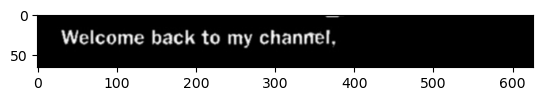

In [6]:
video_path = "/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/videos/3aAi2dqQ1iI.mp4"
video_name = os.path.basename(video_path).split('.')[0]
video_dir = os.path.dirname(video_path)
speaker_dir = os.path.dirname(video_dir)

output_folder = os.path.join(speaker_dir, f"gaussian_bbox_frames_{video_name}")
bbox_dir = output_folder

image_path = os.path.join(bbox_dir, "frame_00615.jpg")
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
print(img.dtype)
plt.imshow(img, cmap='gray')

# Perform OCR
results = ocr.ocr(image_path, cls=True)
print(type(results), len(results))
print(results[0])

# Extract and print OCR results
for result in results[0]:  # Access the first list within results
    text = result[1][0]    # Extract the text
    confidence = result[1][1]  # Extract the confidence score
    print(f"Detected Text: {text}")
    print(f"Confidence: {confidence}")


## Paddle OCR for all the frames

In [10]:
video_path = "/home/vanshg/play/IIITH/research-cvit/lip-reading/auto_avsr/datasets/deaf-youtube/mia_sandra/videos/3aAi2dqQ1iI.mp4"
video_name = os.path.basename(video_path).split('.')[0]
video_dir = os.path.dirname(video_path)
speaker_dir = os.path.dirname(video_dir)

# Paths to the input and output folders
input_folder = os.path.join(speaker_dir, f"gaussian_bbox_frames_{video_name}")
output_folder = os.path.join(speaker_dir, 'padded_bboxes')
os.makedirs(output_folder, exist_ok=True)

# Get a list of all image files in the input folder
image_files = glob.glob(os.path.join(input_folder, "*.jpg"))
print(f"{len(image_files) = }")
# image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for image_file in image_files:
    image_name = os.path.basename(image_file)
    image_path = image_file
    output_path = os.path.join(output_folder, f'padded_{image_name}')

    # Perform OCR
    results = ocr.ocr(image_path, cls=True)

    # Check if OCR results are not None
    if results and results[0]:
        # Combine all detected text into a single string
        transcribed_text = '\n'.join([result[1][0] for result in results[0]])
    else:
        transcribed_text = None

    # Read the original image
    image = cv2.imread(image_path)

    if transcribed_text:
        # Calculate the size for the white patch based on text length
        font_scale = 0.6
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size, _ = cv2.getTextSize(transcribed_text, font, font_scale, 1)
        text_width, text_height = text_size

        # Create a white patch below the original image
        white_patch = np.ones((text_height + 20, image.shape[1], 3), dtype=np.uint8) * 255

        # Combine the original image with the white patch
        combined_image = np.vstack((image, white_patch))

        # Add the transcribed text in red on the white patch
        y0, dy = image.shape[0] + 15, text_height + 10
        for i, line in enumerate(transcribed_text.split('\n')):
            y = y0 + i * dy
            cv2.putText(combined_image, line, (10, y), font, font_scale, (0, 0, 255), 1, cv2.LINE_AA)

        # Save the final image
        cv2.imwrite(output_path, combined_image)
    else:
        # If no text is detected, save the original image without any changes
        cv2.imwrite(output_path, image)

print(f"Processed {len(image_files)} images. All outputs have been saved to '{output_folder}'.")


len(image_files) = 12494
[2024/08/18 15:02:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008862495422363281
[2024/08/18 15:02:00] ppocr DEBUG: cls num  : 1, elapsed : 0.0027818679809570312
[2024/08/18 15:02:00] ppocr DEBUG: rec_res num  : 1, elapsed : 0.033913373947143555
[2024/08/18 15:02:00] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.008502960205078125
[2024/08/18 15:02:00] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/08/18 15:02:00] ppocr DEBUG: rec_res num  : 0, elapsed : 1.1920928955078125e-06
[2024/08/18 15:02:00] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009946346282958984
[2024/08/18 15:02:00] ppocr DEBUG: cls num  : 1, elapsed : 0.003373384475708008
[2024/08/18 15:02:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13423871994018555
[2024/08/18 15:02:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008761167526245117
[2024/08/18 15:02:01] ppocr DEBUG: cls num  : 1, elapsed : 0.002947568893432617
[2024/08/18 15:02:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08063840866088867
[

: 

In [8]:
import cv2
img = cv2.imread('bbox_frames_3aAi2dqQ1iI_youtube_mia_sandra/frame_0900.jpg')
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
import cv2
import os

# Path to the video file
video_path = "cropped_video.mp4"

# Directory to store the frames
output_dir = "frames_cropped"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)
print("Frames per second:", fps)
# Calculate the total number of frames to extract (30 seconds)
total_frames = int(fps * 90)

# Initialize a counter for the frames
frame_count = 0

while cap.isOpened() and frame_count < total_frames:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Write the frame to the output directory
    frame_filename = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)
    
    frame_count += 1

# Release the video capture object
cap.release()

print(f"Extracted {frame_count} frames to {output_dir}")


Frames per second: 30.0
Extracted 455 frames to frames_cropped
